<a href="https://colab.research.google.com/github/Durgamadala/Tesla_stock_prediction/blob/main/Tesla_stock_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df.shape


(2956, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df['Volume'].value_counts()

,count
Volume,
11113000,2
45307500,2
46272500,2
43728000,2
3307500,2
...,...
34701000,1
43965500,1
24519500,1


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df, x = 'Volume')
fig.show()

In [ ]:
x = df.drop(['Volume'], axis = 1)

y = df['Volume']

print(x.head())
print(y.head())

         Date   Open   High    Low  Close  Adj Close
0  2010-06-29  3.800  5.000  3.508  4.778      4.778
1  2010-06-30  5.158  6.084  4.660  4.766      4.766
2  2010-07-01  5.000  5.184  4.054  4.392      4.392
3  2010-07-02  4.600  4.620  3.742  3.840      3.840
4  2010-07-06  4.000  4.000  3.166  3.222      3.222
0    93831500
1    85935500
2    41094000
3    25699000
4    34334500
Name: Volume, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(train_x.head())
print(train_y.head())

            Date       Open       High        Low      Close  Adj Close
2058  2018-08-30  60.452000  60.919998  59.543999  60.630001  60.630001
1116  2014-12-03  45.250000  45.944000  45.099998  45.860001  45.860001
1131  2014-12-24  43.953999  44.500000  43.849998  44.452000  44.452000
1476  2016-05-10  41.509998  41.894001  41.000000  41.737999  41.737999
1380  2015-12-21  46.338001  47.166000  46.216000  46.512001  46.512001
2058    36083500
1116    26538500
1131     6661000
1476    20353000
1380     9766000
Name: Volume, dtype: int64


LINEARREGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Convert 'Date' to ordinal *before* splitting the data
df['Date'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())

x = df.drop(['Volume'], axis=1)
y = df['Volume']

# Now split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

#create a linear regression model
model_lr = LinearRegression()

#train the model on the training data
model_lr.fit(train_x, train_y)

# predictions on the training and test data
y_pred_train_lr = model_lr.predict(train_x)
y_pred_test_lr = model_lr.predict(test_x)

#calculate metrics (optional)
train_mse_lr = mean_squared_error(train_y, y_pred_train_lr)
test_mse_lr = mean_squared_error(test_y, y_pred_test_lr)
train_lr = r2_score(train_y,y_pred_train_lr)
test_r2_lr = r2_score(test_y, y_pred_test_lr)

In [ ]:
print(train_mse_lr)
print(test_mse_lr)
print(train_lr)
print(test_r2_lr)

480663422303253.56
676368914928101.1
0.33431731382186525
0.34014687051725434


LOGISTICREGESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

#call the model
model_lr = LogisticRegression(max_iter = 1000)

# fit the model

model_lr.fit(train_x,train_y)

#predict from the model

y_pred_train=model_lr.predict(train_x)
y_pred_test=model_lr.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(y_pred_test)

[  4938000 132588000  40815500  20947000   4938000  28361500  50665000
  89007500  28361500 142202000  25367000  64265000  28361500 101211000
  60735500 222126200   3645000  90871000   4938000   8572500  61584000
   4938000  44141500   4938000  34717000  50665000  27665000  81908500
  37520500  89410500  28414500   3645000   4938000  25897500  68145500
  61041000 102126500  34472000   3645000  40552000 112377000  28361500
  44438500  50665000  34472000  42484000  66598000  64457500  18140500
   4938000  18140500  32854500  86844000  33870500  47660500  69037500
  19464500   4938000  40758700  86844000  34717000  34472000  31919500
  18140500  93799000   4612500   4938000  22816800 114476000  68145500
  77972000 132588000  25367000  28361500  27665000   4938000   4938000
  85607000  40841500   3645000   4938000  36364500 114476000  67828000
  25367000  18140500  24013500   4938000  34489000  27665000   8572500
  68145500   3645000  28361500   4938000  95139000  35289500  39704500
 14220

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train = accuracy_score(train_y,y_pred_train)
print("accuracy of the logistic regression model on your train",accuracy_train)
accuracy_test=accuracy_score(test_y,y_pred_test)
print("accuracy of the logistic regression model on your test",accuracy_test)


accuracy of the logistic regression model on your train 0.04187817258883249
accuracy of the logistic regression model on your test 0.0


In [ ]:
confusion_matrix(test_y,y_pred_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred_test)

# Get the number of unique classes
num_classes = conf_matrix.shape[0]

# If binary classification (2 classes)
if num_classes == 2:
    tn, fp, fn, tp = conf_matrix.ravel()
    print("TP:", tp)
    print("FN:", fn)
    print("FP:", fp)
    print("TN:", tn)
# If multi-class classification (more than 2 classes)
else:
    # Print the entire confusion matrix or handle it differently
    print("Confusion Matrix:")
    print(conf_matrix)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(train_y, y_pred_train)

# Get the number of unique classes
num_classes = conf_matrix.shape[0]

# If binary classification (2 classes)
if num_classes == 2:
    tn, fp, fn, tp = conf_matrix.ravel()
    print("TP:", tp)
    print("FN:", fn)
    print("FP:", fp)
    print("TN:", tn)
# If multi-class classification (more than 2 classes)
else:
    # Print the entire confusion matrix or handle it differently
    print("Confusion Matrix:")
    print(conf_matrix)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
confusion_matrix(test_y,y_pred_test)
confusion_matrix(train_y,y_pred_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Assuming you have test_y (true labels) and y_pred_test (predicted labels)
conf_matrix = confusion_matrix(test_y, y_pred_test)

# Check if binary classification
if conf_matrix.shape[0] == 2:
    tn, fp, fn, tp = conf_matrix.ravel()  # Unpack values if binary
    Recall = tp / (tp + fn)
    print("Recall of logistic regression is :", Recall)
    Precision = tp / (tp + fp)
    print("Precision of logistic regression is :", Precision)
    f1_score = (2 * Recall * Precision) / (Recall + Precision)  # Correct F1-score formula
    print("F1_score of logistic regression is :", f1_score)
else:
    # Handle multi-class case (e.g., print a message)
    print("Multi-class classification. Metrics calculation skipped.")

Multi-class classification. Metrics calculation skipped.


DECISION TREE

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#call the model
dt = DecisionTreeClassifier(criterion='entropy')
#fit the model
dt.fit(train_x,train_y)
#predict from the model
y_pred_train_dt=dt.predict(train_x)
y_pred_test_dt=dt.predict(test_x)

In [ ]:
accuracy_train = accuracy_score(train_y,y_pred_train)
print("accuracy of the Decision tree model on your train dataset is:",accuracy_train)
accuracy_test=accuracy_score(test_y,y_pred_test)
print("accuracy of the Decision tree model on your test dataset is:",accuracy_test)

accuracy of the Decision tree model on your train dataset is: 0.04187817258883249
accuracy of the Decision tree model on your test dataset is: 0.0


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#create aKNN model
model_knn = KNeighborsClassifier(n_neighbors=5) #
# Train the model on the training and data
model_knn.fit(train_x,train_y)
#predictions on the training and test data
y_pred_train_knn = model_knn.predict(train_x)
y_pred_test_knn = model_knn.predict(test_x)

In [ ]:
print(y_pred_train_knn)
print(y_pred_test_knn)

[26875500 19278000  6661000 ... 17172000 24739000 72279300]
[ 3372500 32854500 23146000 11914500  3772500 34345000 17342500 66766000
 36970000 21428500 23732200 14604900 55142000 21110000 11171000 33583800
  6904500 10173000  4475500  2201000 70683000  6725000 25101500  2720000
 18640000 22527500 10933500 58487500 35328500 28126000 43127700  2779500
  2894500 13905000 20858500 43129000 46650000 19549500  4735000 17583500
 50665000 33525000 76110000 17343000 15157700 10173000 33870500 17771500
 30111900  3098500 29401300 25101500 33655000 12095500 33870500 20765000
 19464500  3750000 22865600 20926000 14597000 18343500 18977000 29401300
 28816000  2070500  3372500 18718000 25494000 15247500 68040500 41918500
 27848900 51003500 14597000  2616000  4478500 24739000 13568000  2030000
  2387000 20626000 23458500 36546500  9800600 40103500 10442000  4186000
 10933500 11754000  1753000 30550000  7179500 51336500  4931500 19491000
 23602100 20128500 12328000 28271800 33557000 31812000 19888100 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 # Import the f1_score function
accuracy_test = accuracy_score(test_y,y_pred_test_knn)
print("Accuracy of the KNN model on your test dataset is:",accuracy_test)
precision_test = precision_score(test_y,y_pred_test_knn,average='weighted')
print("The precision for KNN is:",precision_test)
recall_test = recall_score(test_y,y_pred_test_knn, average='weighted')
print("The recall for KNN is :",recall_test)
f1score_test = f1_score(test_y,y_pred_test_knn, average='weighted')
print("the f1-score for KNN is:",f1score_test)

Accuracy of the KNN model on your test dataset is: 0.0
The precision for KNN is: 0.0
The recall for KNN is : 0.0
the f1-score for KNN is: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
accuracy_train=accuracy_score(train_y,y_pred_train_knn)
print("accuracy of the KNN model on your train dataset is:",accuracy_train)

accuracy of the KNN model on your train dataset is: 0.16962774957698815


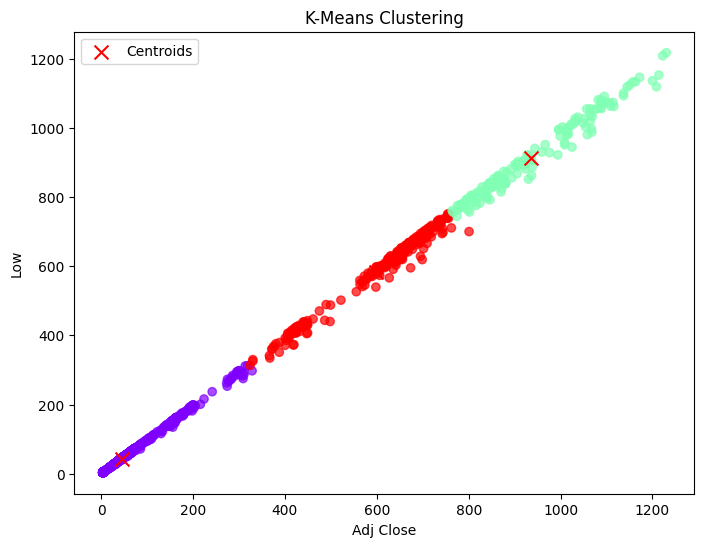

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



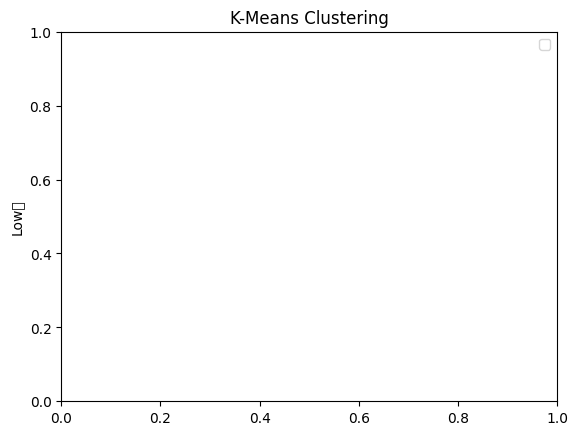

In [ ]:
# k means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#create KMeans model
k=3 #Number of clusters
model_kmeans = KMeans(n_clusters=k, random_state=42)
#select the columns for clustering
columns_for_clustering = ['Adj Close','Low']
df_for_clustering = df[columns_for_clustering]

#fit the model to the data
model_kmeans.fit(df_for_clustering)

#get cluster labels
cluster_labels = model_kmeans.labels_

#get cluster centers
cluster_centers = model_kmeans.cluster_centers_

#plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(df_for_clustering['Adj Close'],
            df_for_clustering['Low'],
            c=cluster_labels,
            cmap='rainbow',
            alpha=0.7)
plt.scatter(cluster_centers[:,0],
            cluster_centers[:,1],c='red',
            marker='x',s=100, label='Centroids')
plt.xlabel('Adj Close')
plt.ylabel('Low')
plt.title('K-Means Clustering')
plt.legend()
plt.show()




plt.ylabel('Low	')
plt.title('K-Means Clustering')
plt.legend()
plt.show()




Inertia: 1855087218.7341905
Silhouette Score: 0.5733206640347678
Davies-Bouldin Index: 0.6286883363749481
Calinski-Harabasz Index: 5736.881392532853
Homogenity: 0.08615117644813863
Completeness: 0.9938957735665412
V-measure: 0.1585584592566583


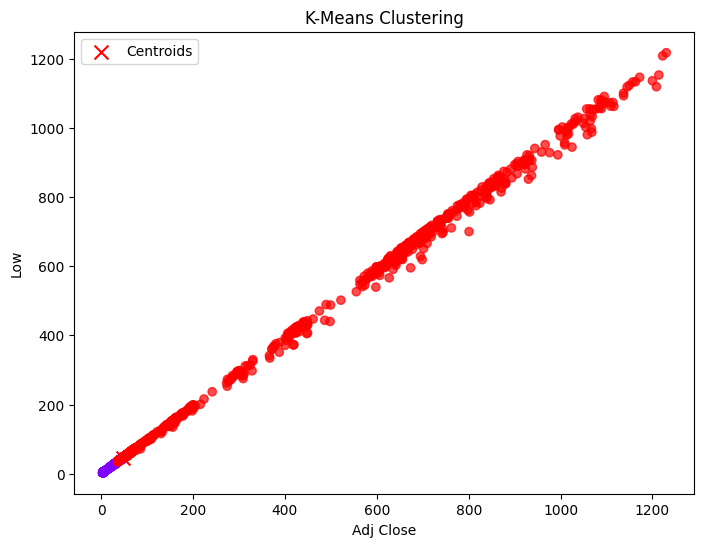

In [ ]:
#k means performance metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score,homogeneity_score, completeness_score,v_measure_score
import matplotlib.pyplot as plt

# Assuming you have x (features) and y (labels)

# Create KMeans model
k = 2 # Number of clusters
model_kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
model_kmeans.fit(x)

# Get cluster labels
cluster_labels = model_kmeans.labels_

# Inertia
inertia = model_kmeans.inertia_
print("Inertia:",inertia)

# Silhouette score
silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:",silhouette)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x, cluster_labels)
print("Davies-Bouldin Index:",davies_bouldin)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(x, cluster_labels)
print("Calinski-Harabasz Index:",calinski_harabasz)

# Homogenity, completeness, and V-measure
homogeneity = homogeneity_score(y, cluster_labels)
completeness = completeness_score(y, cluster_labels)
v_measure = v_measure_score(y, cluster_labels)
print("Homogenity:",homogeneity)
print("Completeness:",completeness)
print("V-measure:",v_measure)

# Assuming 'df' is your DataFrame and it's already loaded
# If not, you need to load your DataFrame first

# Select the columns for clustering
columns_for_clustering = ['Adj Close', 'Low']
df_for_clustering = df[columns_for_clustering]

# Re-fit the model to the data for plotting purposes
model_kmeans.fit(df_for_clustering)  # This line is crucial to ensure cluster_centers are consistent with df_for_clustering
cluster_centers = model_kmeans.cluster_centers_


# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_for_clustering['Adj Close'], df_for_clustering['Low'], c=cluster_labels, cmap='rainbow', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Adj Close')
plt.ylabel('Low')
plt.title('K-Means Clustering')
plt.legend()
plt.show()




MODEL PREDICTION

In [ ]:
x = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']]
y = df['Volume']

In [ ]:
user_input=[[1,1,1,0,1,1]]
model_lr.predict(user_input)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([25397400])

In [ ]:
user_input=[[1,1,1,0,1,1]]
dt.predict(user_input)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([34608500])